In [5]:
from IPython.display import display, Math, Latex

### Linear Regression Analysis

* Supervised learning involves training a model on a labeled dataset, which means that each training example is paired with an output label. The goal is for the model to learn a mapping from inputs (features) to outputs (labels) that can be used to predict the labels of new, unseen data. Common algorithms used in supervised learning include linear regression, logistic regression, support vector machines, and neural networks.

1. Linear regression is used for predicting continuous numerical values by modeling the relationship between independent variables and a dependent variable.
* Function: It fits a straight line (y = β0 + β1x + … + βnxn) where y is the output, and x represents input features.
* Output Interpretation: It predicts numerical values without bounding them between 0 and 1.
* Use Cases: Stock price forecasting, house price predictions, sales revenue estimation.

    $ Regression Model: f(x) = y - or- y = a + bX$\\
   $$  \begin{aligned} \text{where } x \text{ is the explanatory variable}
\quad
y \text{ is the dependent variable}, 
\quad
b \text{ is the slope of the line}, 
\quad
c \text{ is the intercept value of } y \text{ when } x = 0.
\end{aligned} $$


#### 2. MultiCollinearity & Variance Inflation Factor

* VIF < 5 is generally acceptable
* VIF > 5 means there is moderate multicollinearity
* VIF >10 means there is high multicollinearity



#### 3. Evaluating Output

* Mean Squared Error (MSE): A lower MSE indicates better model performance, as it means the predictions are closer to the actual values.
     * Smaller SE --> the sample mean is likely close to the true population mean
     * Larger SE --> more variability meaning the sample mean might be farther from the actual population mean
       
  
* R-squared (R²): A higher R² value (closer to 1) indicates that the model explains a large proportion of the variance in the dependent variable, suggesting a good fit 4.

    * The adjusted R-squared is a modified version of the R-squared that adjusts for the number of predictors in a regression model. it is calculated as:
  
* Score: The score method returns the coefficient of determination ( R^2 ) of the prediction, which indicates how well the model explains the variance in the dependent variable. A higher ( R^2 ) value (closer to 1) suggests a better fit.A higher ( R^2 ) value indicates that the model explains a larger proportion of the variance in the dependent variable, suggesting a better fit.
	
* Coefficients: The coef_ attribute contains the coefficients of the independent variables in the linear regression model. These coefficients represent the change in the dependent variable for a one-unit change in the corresponding independent variable, holding other variables constant.Positive coefficients indicate a direct relationship between the independent variable and the dependent variable, while negative coefficients indicate an inverse relationship. The magnitude of the coefficient shows the strength of the relationship.
		
* Intercept(intercept_) The intercept_ attribute represents the intercept of the regression line, which is the predicted value of the dependent variable when all independent variables are zero.The intercept provides the baseline value of the dependent variable when all independent variables are zero. It helps in understanding the starting point of the regression line.

	
* Significant F: The Significance F is the p-value associated with this F-statistic. It tells us whether the independent variables, as a group, significantly impact the dependent variable.

    * Low Significance F (typically < 0.05) → Strong evidence that at least one independent variable influences the dependent variable.
    * High Significance F (> 0.05 or 0.10) → The predictors might not have a meaningful effect
	
### 4. Residuals


* Residuals measure the difference between observed values and the predictions made by the model. It tells us how far off the prediction is
    * If the residuals are small, the model is making accurate predictions
    * if the residuals are large, the model may not be fitting the data well
    * if the residuals are randomly distributed, it suggests a good model
    * if the residuals show a pattern, the model may be missing important trends

* Formula:

$ Residual = y_{\text{actual}}  − y_{\text{predicted}} = y - \hat{y} $

* code to produce residuals (see end of notebook for results and analysis)

    residuals = ly_test-y_predictlife

    residual_skewness = skew(residuals)
  
    print("Mean Residual:", np.mean(residuals))  # Should be close to 0
  
    print("Residual Std Dev:", np.std(residuals))
  
    print("Residual Skewness:", residual_skewness)

### Compute VIF
* First identify if there is multicollinearity amongst the independent variables using VIF
* assign feature variables to x
* 
vif_x= uber[["High","Low","Open","Volume"]]
* use add_constant to add an intercept to ensure proper variance calculation otherwise the variance formula will ensure no intercept
  
vif_x = add_constant(vif_x)

VIFdf = pd.DataFrame()
VIFdf["X_Variables"]= vif_x.columns

VIFdf["VIF_Values"] = [variance_inflation_factor(vif_x.values,i)
                           for i in range(len(vif_x.columns))]


VIFdf 

In [9]:
from IPython.display import display, Math, Latex
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report as report
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy.stats import skew


#including plotly libraries to practice creating plotly and dash apps
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)

$ F = \frac{\text{Explained variance / Degrees of freedom}}{\text{Unexplained variance / Degrees of freedom}} $


$  \text{Residual} = y_{\text{actual}} - y_{\text{predicted}} = y - \hat{y} $


In [11]:
#linear Regression Analysis to Predict Uber Stock Prices

#load and inspect Data

uber = pd.read_csv('uber_stock_data.csv')

uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1444 non-null   object 
 1   Adj Close  1444 non-null   float64
 2   Close      1444 non-null   float64
 3   High       1444 non-null   float64
 4   Low        1444 non-null   float64
 5   Open       1444 non-null   float64
 6   Volume     1444 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 79.1+ KB


In [12]:
uber.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500


In [16]:
#convert date to datetime object

uber['Date']=pd.to_datetime(uber.Date)

uber.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
1439,2025-01-30,66.589996,66.589996,67.222000,63.419998,63.419998,33246500
1440,2025-01-31,66.849998,66.849998,67.870003,66.333000,67.089996,19805600
1441,2025-02-03,67.290001,67.290001,68.849998,65.178001,65.300003,25290000
1442,2025-02-04,69.750000,69.750000,70.190002,67.690002,67.690002,33786200
1443,2025-02-05,64.480003,64.480003,66.750000,63.500000,66.500000,74772959


In [18]:
uber.corr()

,Date,Adj Close,Close,High,Low,Open,Volume
Date,1.000000,0.580404,0.580404,0.577814,0.582799,0.578116,-0.037250
Adj Close,0.580404,1.000000,1.000000,0.998990,0.998969,0.997606,-0.171254
Close,0.580404,1.000000,1.000000,0.998990,0.998969,0.997606,-0.171254
High,0.577814,0.998990,0.998990,1.000000,0.998732,0.998944,-0.160054
Low,0.582799,0.998969,0.998969,0.998732,1.000000,0.998795,-0.183612
Open,0.578116,0.997606,0.997606,0.998944,0.998795,1.000000,-0.172961
Volume,-0.037250,-0.171254,-0.171254,-0.160054,-0.183612,-0.172961,1.000000


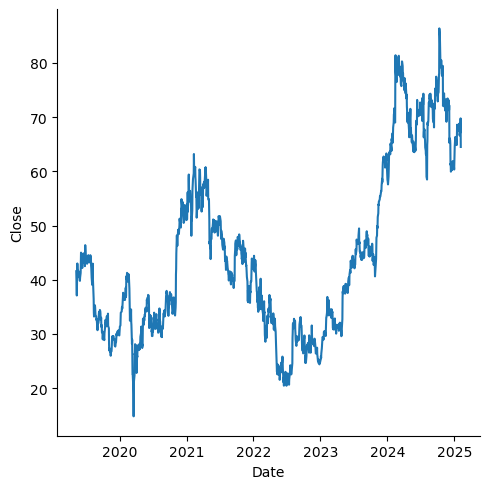

In [20]:
#assign independent and dependent variables

sns.relplot(data=uber,x='Date',y='Close',kind='line')

In [22]:
#assign independent and dependent variables

#assign close price as the dependent variable
y=uber['Close']
x=uber[['Open']]

In [24]:
#split-train-test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [26]:
y_test.shape

(289,)

In [28]:
#create and train model

ubermodel = LinearRegression()

ubermodel.fit(x_train,y_train)

LinearRegression()

In [30]:
#make predictions

ypredict = ubermodel.predict(x_test)

In [32]:
#evaluate model
from sklearn.metrics import mean_squared_error,r2_score
ubermse=mean_squared_error(y_test,ypredict)
uberr2 = r2_score(y_test,ypredict)

print(f'score: {ubermodel.score(x_test,y_test)}\ncoefficent: {ubermodel.coef_}\nintercept: {ubermodel.intercept_}\n\
Mean Squared Error: {ubermse}\nR-Squared: {uberr2}')

score: 0.9965868014880338
coefficent: [0.99610929]
intercept: 0.14616318882588075
Mean Squared Error: 0.8126811059150788
R-Squared: 0.9965868014880338


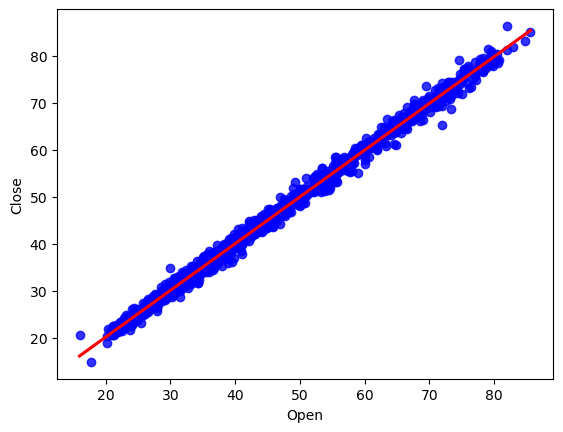

In [34]:
# Plotting
#plot relationship between AAPL and NASDAQ on a scatterplot
# Create scatterplot with regression line
sns.regplot(x="Open", y="Close", data=uber, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Show plot
plt.show()


In [33]:
# Compute VIFre.
#First identify if there is multicollinearity amongst the independent variables using VIF
#assign feature variables to x 
vif_x= uber[["High","Low","Open","Volume"]]
#use add_constant to add an intercept to ensure proper variance calculation otherwise the variance formula will ensure no intercept
vif_x = add_constant(vif_x)

VIFdf = pd.DataFrame()
VIFdf["X_Variables"]= vif_x.columns

VIFdf["VIF_Values"] = [variance_inflation_factor(vif_x.values,i)
                           for i in range(len(vif_x.columns))]


VIFdf #high multicollinearity between High,Low, and Open

,X_Variables,VIF_Values
0,const,12.774700
1,High,723.690206
2,Low,615.559613
3,Open,621.269880
4,Volume,1.337945


In [35]:
#linear regression predicting life expectancy using OLS
life = pd.read_csv('Life Expectancy Data.csv')

life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [37]:
display(life.head(),life.tail())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [39]:
life.Status.value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [41]:
#count nulls
life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [43]:
findNaN = life[life.isnull().any(axis=1)]

In [45]:
display(findNaN)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,47.0,23,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,46.1,23,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,45.3,24,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,44.4,25,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,17.6,62,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,17.3,66,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,17.1,70,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,16.8,72,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


In [100]:
#replace space in column names with an underscore
life.rename(columns={col: col.replace(' ','_') for col in life.columns},inplace=True)

life.rename(columns={'Life_expectancy_':'Life_Expectancy','_BMI_':'BMI','Measles_':'Measles','under-five_deaths_':'under_five_deaths',
                     'Diphtheria_':'Diphteria','_HIV/AIDS':'HIV/AIDS','thinness_1-19_years':'thinness_1_19_years',
                     '_thinness_5-9_years':'thinness_5_9_years'},inplace=True)

life.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphteria', 'HIV/AIDS', 'GDP', 'Population', '_thinness__1-19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [102]:
lifeexpnulls = life[life.Life_Expectancy.isnull()]
#drop rows with nulls
life=life.dropna()

In [104]:
life

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphteria,HIV/AIDS,GDP,Population,_thinness__1-19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [106]:
developing = life.query('Status== "Developing"').copy()

In [108]:
developing.describe()

,Year,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphteria,HIV/AIDS,GDP,Population,_thinness__1-19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1.407000e+03,1407.000000,1407.000000,1407.000000,1407.000000
mean,2007.898365,67.687349,182.667377,38.002132,3.517896,362.229259,77.727790,2525.413646,35.684861,51.638948,81.685146,5.772374,82.351102,2.307889,3259.395220,1.566995e+07,5.437953,5.500640,0.596359,11.525871
std,4.044425,8.353983,128.300036,130.057737,3.331855,867.960129,26.222062,10862.141343,19.054033,175.292604,23.617771,2.183726,22.690329,6.475861,5922.803226,7.588268e+07,4.723182,4.777703,0.174284,2.494198
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,62.800000,99.000000,1.000000,0.550000,30.530123,72.000000,0.000000,18.800000,1.000000,77.000000,4.305000,78.000000,0.100000,413.445556,1.787860e+05,1.900000,2.000000,0.487000,10.000000
50%,2008.000000,69.200000,163.000000,6.000000,2.730000,94.178195,88.000000,15.000000,36.200000,7.000000,91.000000,5.610000,91.000000,0.100000,1243.328240,1.348248e+06,3.900000,3.900000,0.638000,11.800000
75%,2011.000000,73.800000,247.000000,27.500000,5.780000,366.197789,96.000000,484.500000,52.700000,39.000000,96.000000,7.100000,96.000000,1.100000,3845.903590,7.906116e+06,7.600000,7.650000,0.716500,13.100000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,9748.636237,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,52496.694870,1.293859e+09,27.200000,28.200000,0.912000,17.300000


In [217]:
developing.rename(columns={'HIV/AIDS':'HIV_AIDS'},inplace=True)
developing.rename(columns={'_thinness__1-19_years':'thinness__1to19_years'},inplace=True)
developing.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphteria                          0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness__1to19_years              0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [157]:
#linear regression with OLS

disease= ['Measles','Polio','HIV_AIDS','Diphteria']

diseases = ols('Life_Expectancy ~ Polio + Hepatitis_B + Measles + Diphteria + HIV_AIDS',data=developing).fit()

print(diseases.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     229.5
Date:                Tue, 13 May 2025   Prob (F-statistic):          3.97e-179
Time:                        19:23:31   Log-Likelihood:                -4561.7
No. Observations:                1407   AIC:                             9135.
Df Residuals:                    1401   BIC:                             9167.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      61.2044      0.705     86.812      

In [143]:


economic = ols('Life_Expectancy ~ GDP + Schooling + Income_composition_of_resources',data=developing).fit()

print(economic.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     486.4
Date:                Tue, 13 May 2025   Prob (F-statistic):          1.33e-216
Time:                        19:15:31   Log-Likelihood:                -4481.1
No. Observations:                1407   AIC:                             8970.
Df Residuals:                    1403   BIC:                             8991.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [309]:
diseasedf = developing[['Life_Expectancy','Adult_Mortality','HIV_AIDS','GDP','BMI',
                        'Income_composition_of_resources','infant_deaths',
                        'Schooling','thinness_5_9_years','thinness__1to19_years',]]

diseasedf.corr()

,Life_Expectancy,Adult_Mortality,HIV_AIDS,GDP,BMI,Income_composition_of_resources,infant_deaths,Schooling,thinness_5_9_years,thinness__1to19_years
Life_Expectancy,1.000000,-0.681218,-0.614953,0.415982,0.523660,0.649761,-0.138615,0.670470,-0.373670,-0.374320
Adult_Mortality,-0.681218,1.000000,0.548827,-0.201854,-0.318261,-0.367101,0.012877,-0.347454,0.216080,0.200230
HIV_AIDS,-0.614953,0.548827,1.000000,-0.095775,-0.194971,-0.216240,-0.006471,-0.177971,0.152442,0.141073
GDP,0.415982,-0.201854,-0.095775,1.000000,0.313800,0.432546,-0.094986,0.484102,-0.244208,-0.244280
BMI,0.523660,-0.318261,-0.194971,0.313800,1.000000,0.475449,-0.228147,0.549518,-0.546707,-0.537689
Income_composition_of_resources,0.649761,-0.367101,-0.216240,0.432546,0.475449,1.000000,-0.096435,0.730915,-0.348283,-0.366427
infant_deaths,-0.138615,0.012877,-0.006471,-0.094986,-0.228147,-0.096435,1.000000,-0.193642,0.454504,0.455892
Schooling,0.670470,-0.347454,-0.177971,0.484102,0.549518,0.730915,-0.193642,1.000000,-0.393643,-0.418154
thinness_5_9_years,-0.373670,0.216080,0.152442,-0.244208,-0.546707,-0.348283,0.454504,-0.393643,1.000000,0.919919
thinness__1to19_years,-0.374320,0.200230,0.141073,-0.244280,-0.537689,-0.366427,0.455892,-0.418154,0.919919,1.000000


In [271]:
# Compute VIFre.
#First identify if there is multicollinearity amongst the independent variables using VIF
#assign feature variables to x 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lvif_x = scaler.fit_transform(developing[['GDP', 'Income_composition_of_resources',
                                          'Schooling', 'HIV_AIDS', 'Adult_Mortality','BMI']])
# Convert back to DataFrame
lvif_x = pd.DataFrame(lvif_x, columns=['GDP', 'Income_composition_of_resources', 'Schooling','HIV_AIDS',
                                      'Adult_Mortality','BMI'])


#use add_constant to add an intercept to ensure proper variance calculation otherwise the variance formula will ensure no intercept
lvif_x = add_constant(lvif_x)

lVIFdf = pd.DataFrame()
lVIFdf["X_Variables"]= lvif_x.columns

lVIFdf["VIF_Values"] = [variance_inflation_factor(lvif_x.values,i)
                           for i in range(len(lvif_x.columns))]


lVIFdf #no evidence of multicollinearity

,X_Variables,VIF_Values
0,const,1.000000
1,GDP,1.333069
2,Income_composition_of_resources,2.277526
3,Schooling,2.589659
4,HIV_AIDS,1.436194
5,Adult_Mortality,1.621886
6,BMI,1.492634


In [273]:
#linear regression

lx=scaler.fit_transform(developing[['GDP', 'Income_composition_of_resources', 'Schooling', 'HIV_AIDS','Adult_Mortality','BMI']])
lx = pd.DataFrame(lvif_x, columns=['GDP', 'Income_composition_of_resources', 'Schooling', 'HIV_AIDS','Adult_Mortality','BMI'])
ly=developing['Life_Expectancy']

In [275]:
#train test split

lx_train,lx_test,ly_train,ly_test = train_test_split(lx,ly,test_size=.2,random_state = 42)

In [277]:
lx_train

,GDP,Income_composition_of_resources,Schooling,HIV_AIDS,Adult_Mortality,BMI
1335,-0.525423,0.543220,1.112629,-0.217483,0.571775,1.050815
579,-0.489255,0.462863,0.551126,-0.310168,-0.013001,-0.529465
1137,-0.524411,-0.811370,-1.734990,-0.341063,0.408038,0.116297
48,0.014939,-0.667876,-1.213595,0.029676,1.452836,-0.833971
155,-0.324951,-3.422975,-0.772415,-0.310168,0.486008,-0.959973
...,...,...,...,...,...,...
1095,-0.437047,0.876128,0.791770,-0.341063,-0.395054,1.056065
1130,-0.525692,-0.656396,-1.013059,-0.341063,-1.408664,0.426053
1294,0.246444,0.411205,0.150053,-0.341063,-0.371663,1.061315
860,-0.067195,-0.002060,-0.411449,-0.341063,-0.519806,0.893312


In [279]:
#train the model

lifemodel= LinearRegression()
lifemodel.fit(lx_train,ly_train)

LinearRegression()

In [281]:
#model prediction

y_predictlife = lifemodel.predict(lx_test)

In [354]:
#evaluate the model
lifemse=mean_squared_error(y_test,ypredict)
lifer2 = r2_score(ly_test,y_predictlife)

print(f'score: {lifemodel.score(lx_test,ly_test)}\ncoefficent: {lifemodel.coef_}\nintercept: {lifemodel.intercept_}\n\
Mean Squared Error: {lifemse}\nR-Squared: {lifer2}')

score: 0.763677517657537
coefficent: [ 0.66747585  1.39295769  2.53838389 -2.8881963  -2.29769604  0.76073049]
intercept: 67.79238037685494
Mean Squared Error: 0.8126811059150788
R-Squared: 0.763677517657537


In [358]:
#calculate residuals

residuals = ly_test-y_predictlife
residual_skewness = skew(residuals)
print("Mean Residual:", np.mean(residuals))  # Should be close to 0
print("Residual Std Dev:", np.std(residuals))
print("Residual Skewness:", residual_skewness)

Mean Residual: -0.5240396816840446
Residual Std Dev: 3.8916069709331085
Residual Skewness: -0.296152827787853


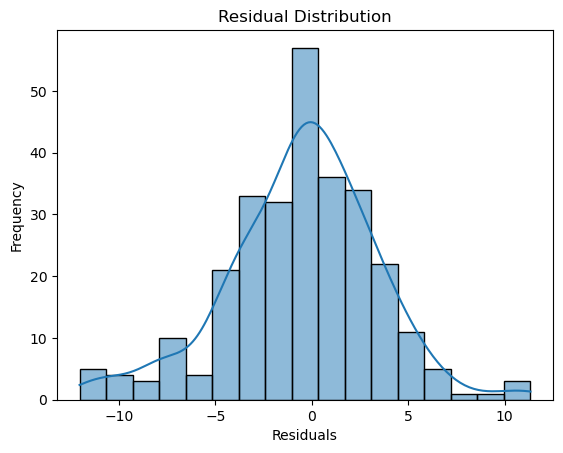

In [320]:
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

* Evaluation: A score/r-squared of .7636 means 76.36% of the dependent variable (life expectancy) is explained by 
the independent feature variables of GDP,Income_Composition_of_Resources, Schooling, HIV_AIDS, Adult Mortality,
and BMI
* The coefficients for GDP, Income Composition of Resources, Schooling, and BMI are all positive contributors to life expectancy while HIV/AIDs and Adult Mortality are negative contributors
* The intercept indicates that life expectancy is predicted at 67.79 when all predictors are zero
* The mean residual of -0.52 and residual std dev of 3.89 give insight into the mean square error 0f 0.813 as the indicate a slight bias in predictions where the model slightly underpredicts life expectancy on average and there is a fairly large spread of residuals so predictions are off by several units. Finally a negative skew of -0.296 suggests a slight left skew where the model is overpredicting lower life expectancy and underpredicting higher life expectancy.However, since the skew is close to zero, the model is reasonably well balanced so it doesn't have extreme bias  